Carles Falcó i Gandia

Perm Number: 7621931

falcoigandia@ucsb.edu

In [1]:
from numpy import exp, array, log, linspace, geomspace, log10
from pandas import DataFrame, options
import matplotlib.pyplot as plt
from scipy.stats import linregress
from math import pi

# Approximating $f'(x_0)$

Let $f(x) = e^x$

(a) We'll compute the centered difference for $x_0 = 1/2$ and $h=0.1/2^n$ for $n=0,1,\ldots,10$. We'll verify too, the quadratic rate of convergence.

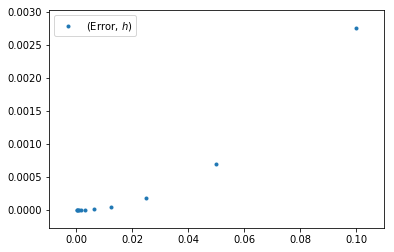

The actual value of the derivative is f'(1/2) = 1.648721


,$D_h^0 f(1/2)$,$h$,Error
0,1.651471,0.100000,2.749243e-03
1,1.649408,0.050000,6.870531e-04
2,1.648893,0.025000,1.717472e-04
3,1.648764,0.012500,4.293579e-05
4,1.648732,0.006250,1.073388e-05
5,1.648724,0.003125,2.683467e-06
6,1.648722,0.001563,6.708665e-07
7,1.648721,0.000781,1.677166e-07
8,1.648721,0.000391,4.192926e-08
9,1.648721,0.000195,1.048235e-08


In [2]:
fun = lambda x: exp(x) # Our function
x_0 = 1/2 # x0
h_ar = array( [0.1/2**n for n in range(0,10+1)] ) # h

# Computing centered difference
# INPUT: f,x0,h
# OUTPUT: D_h^0 f(x0)
# Carles Falcó i Gandia
# 17/01/2019

def cent_diff(f,x0,h):
    return ( f(x0 + h) - f(x0 - h) )/2/h

# Results

D = cent_diff(fun,x_0,h_ar)
error = abs(D-exp(1/2))

# Plot of error vs h
plt.scatter(h_ar, error,
            marker = '.', label = '(Error, $h$)')
plt.legend()
plt.ylim(-max(error)*0.1, max(error)*1.1)
plt.show()

# Data 
data_1 = {'$h$':h_ar,'$D_h^0 f(1/2)$':D,'Error':error}
print("The actual value of the derivative is f'(1/2) = %.6f" % exp(1/2))
DataFrame(data_1)

From the plot at the table we can verify the quadratic rate of convergence. We can confirm it by taking the $\log$ of the error and $h$, and finding the slope of a linear regression.

In [3]:
# Finding rate of convergence
l_error = log(error)
l_h = log(h_ar)
slope = linregress(l_h,l_error)[0]
print('We have found a slope = %.5f' % slope)

We have found a slope = 2.00002


We see that in a very good approximation the error "goes" like $h^2$.

(b) We'll find now the optimal value of $h$ considering round-off and truncation errors. If the difference is computed exactly, we'll have, for $|\delta_x|,|\delta_y|<\epsilon$:
$$\frac{f(x_0+h)(1+\delta_x)-f(x_0-h)(1-\delta_y)}{2h} = \frac{f(x_0+h)-f(x_0-h)}{2h}+r_h$$
with $$|r_h| = \big|\frac{f(x_0+h)\delta_x-f(x_0-h)\delta_y}{2h}\big|\leq\big(|f(x_0+h)|+|f(x_0-h)|\big)\frac{\epsilon}{2h}\approx \frac{|f(x_0)|\epsilon}{h}$$

Now we can bound the total error with:
$$M_3h^2+\frac{|f(x_0)|\epsilon}{h}$$

where $M_3=|f'''(\eta)|/6$.
This is minimized when $h = h_0$:
$$h_0=\Big(\frac{3\epsilon|f(x_0)|}{M_3}\Big)^{1/3}=c\epsilon^{1/3}\sim\epsilon^{1/3}$$

We'll verify numerically that the error is minimum in this case.

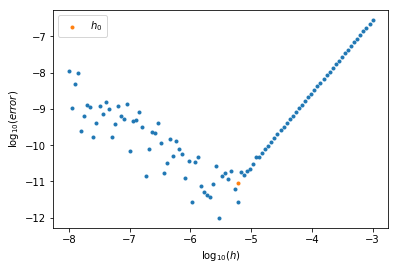

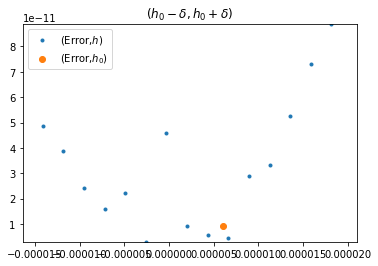

In [4]:
# Verifying optimal value of h
# Carles Falcó i Gandia
# 17/01/2019

eps = 2**(-52) # Machine precision
h_opt = (eps)**(1/3) # Close to optimal h

h_range_1 = geomspace(1e-8,1e-3,100) 
D_21 = cent_diff(fun, 1/2, h_range_1) # Centered differences h_range
error_21 = abs(D_21-exp(1/2)) # Error
# Taking logarithms for better visualization
l_h_1 = log10(h_range_1)
l_error_1 = log10(error_21)

h_range_2 = linspace(h_opt - h_opt/0.3, h_opt + h_opt/0.5,15) # Small interval around h_opt
D_22 = cent_diff(fun, 1/2, h_range_2) # Centered differences h_range
error_22 = abs(D_22-exp(1/2)) # Error

# Large range of h
plt.scatter(l_h_1, l_error_1,marker = '.')
plt.scatter(log10(h_opt),
            log10(abs(cent_diff(fun,1/2,h_opt)-exp(1/2))),
           marker = '.',label = '$h_0$')
plt.legend()
plt.xlabel('$\log_{10}(h)$')
plt.ylabel('$\log_{10}(error)$')
plt.show()

# Plot near h_0
plt.title('$(h_0-\delta,h_0+\delta)$')
plt.scatter(h_range_2, error_22,
            marker = '.', label = '(Error,$h$)')
plt.scatter(h_opt,abs(cent_diff(fun,1/2,h_opt)-exp(1/2)),
           label = '(Error,$h_{0}$)')
plt.legend()
plt.xlim(h_range_2[0]*1.16,h_range_2[-1]*1.16)
plt.ylim(min(error_22),max(error_22))
plt.show()

In light of the above we see that we have the order of the minimum error when taking $h_0 = \epsilon^{1/3}$. Note that, the best error we can get is $\sim10^{-11}$, which differs in 5 orders of magnitude from the machine precision. This is exactly $O(\epsilon^{2/3})$.

(c) We'll construct a fourth order approximation to $f'(1/2)$ by using Richardson extrapolation. We know that:
$$D_h^0f(x_0) = f'(x_0)+c_2h^2+c_4h^4+\ldots$$
By writing $D_{h/2}^0f(x_0)$ and substracting we can get:
$$D_h^{ext}f(x_0) = \frac{4D_{h/2}^0f(x_0)-D_h^0f(x_0)}{3} = f'(x_0)+Ch^4+\ldots$$ Using this we can compute an approximation to $f'(1/2)$. We'll verify as in the previous case, the rate of convergence.

In [5]:
h_ar_r = array( [0.1/2**n for n in range(0,6+1)] ) # Avoid round_off
# Richardson extrapolation, centered difference
# INPUT: f,x0,h
# OUTPUT: D_h^ext f(x0)
# Carles Falcó i Gandia
# 17/01/2019

def rich_cent_diff(f,x0,h):
    return 1/3*(4*cent_diff(f,x0,h/2)-cent_diff(f,x0,h))

# Results

D_r = rich_cent_diff(fun,x_0,h_ar_r)
error_r = abs(D_r-exp(1/2))

# Data 
options.display.float_format = '{:,.15f}'.format
data_2 = {'$h$':h_ar_r,'$D_h^{ext} f(.5)$':D_r,'Error':error_r}
print("The actual value of the derivative is f'(1/2) = %.15f" % exp(1/2))
DataFrame(data_2)

The actual value of the derivative is f'(1/2) = 1.648721270700128


,$D_h^{ext} f(.5)$,$h$,Error
0,1.648720927114287,0.100000000000000,0.000000343585841
1,1.648721249230807,0.050000000000000,0.000000021469321
2,1.648721269358376,0.025000000000000,0.000000001341752
3,1.648721270616254,0.012500000000000,0.000000000083874
4,1.648721270694935,0.006250000000000,0.000000000005193
5,1.648721270699838,0.003125000000000,0.000000000000290
6,1.648721270700146,0.001562500000000,0.000000000000017


We can verify the rate of convergence in the same way as before

In [6]:
# Finding rate of convergence
l_error_r = log(error_r)
l_h_r = log(h_ar_r)
slope_r = linregress(l_h_r,l_error_r)[0]
print('We have found a slope = %.5f' % slope_r)

We have found a slope = 4.03879


We have found then that the error goes approximately as $h^4$ as we expected. In this case the total error is bounded by:
$$Ch^4+\frac{|f(x_0)|\epsilon}{h}$$

Then we will find the minimum error when this two terms become comparable, this is when $h_0\sim\epsilon^{1/5}$. This implies that the minimum error is approximately $\epsilon^{4/5}$. We can do a similar plot to verify it.

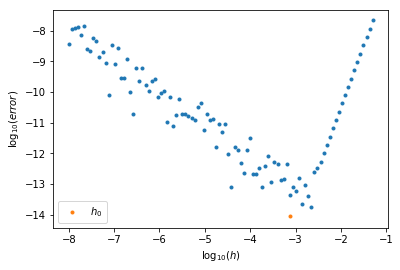

In [7]:
# Verifying optimal value of h
# Carles Falcó i Gandia
# 17/01/2019

h_opt_r = (eps)**(1/5) # Close to optimal h

h_range_r = geomspace(1e-8,5e-2,100) 
D_21_r = rich_cent_diff(fun, 1/2, h_range_r) # Centered differences h_range
error_21_r = abs(D_21_r-exp(1/2)) # Error
# Taking logarithms for better visualization
l_h_r = log10(h_range_r)
l_error_1_r = log10(error_21_r)

# Large range of h
plt.scatter(l_h_r, l_error_1_r,marker = '.')
plt.scatter(log10(h_opt_r),
            log10(abs(rich_cent_diff(fun,1/2,h_opt_r)-exp(1/2))),
           marker = '.',label = '$h_0$')
plt.legend()
plt.xlabel('$\log_{10}(h)$')
plt.ylabel('$\log_{10}(error)$')
plt.show()

As seen in the plot, the minimum error we can make is $\sim10^{-14}$.

(d) Now we'll use the Cauchy's Integral Formula to express $f'(x_0)$ as:
$$f'(x_0) = \frac{1}{2\pi r}\int_0^{2\pi}f(x_0+re^{i\theta})e^{-i\theta}d\theta$$

By using the Composite Trapezoidal Rule we can approximate this integral up to machine precision.

In [8]:
r = 1/2 # free choice

# Composite Trapezoidal Rule
# INPUT: h, function, a, b
# OUTPUT: Thf
# Carles Falcó i Gandia
# 17/01/2019

def ctr(f,h,a,b):
    N = int((b-a)/h)
    return h*sum( [f(a + i*h) for i in range(1,N)] ) + h/2*(f(a) + f(b))

# Approximating the derivative
# INPUT: f, x0, h
# OUTPUT: Th(cauchy integral formula)
# Carles Falcó i Gandia
# 17/01/2019
def cauchy_f_diff(f,x0,h):
    f2 = lambda theta: f(x0 + r*exp(1j*theta))*exp(-1j*theta)
    return (ctr(f2,h,0,2*pi)/2/pi/r).real

# Estimating needed h for machine precision

N = 2 # Number of points, composite trapezoidal rule
while( abs( cauchy_f_diff(fun,x_0,2*pi/N)-exp(x_0) ) > eps and N < 100):
    N += 1

# Results
print('We find an error smaller than the machine precision for N = %i' % N)
print("The approximated value of f'(x_0) = %.16f" % cauchy_f_diff(fun,x_0,2*pi/N))
print("The actual value of f'(x_0) = %.16f" % exp(x_0))

We find an error smaller than the machine precision for N = 14
The approximated value of f'(x_0) = 1.6487212707001282
The actual value of f'(x_0) = 1.6487212707001282


# Error term, sided difference approximation

We'll find the error term of the sided difference approximation to $f'(x_0)$:
$$D_hf(x_0)=\frac{-f(x_0+2h)+4f(x_0+h)+3f(x_0)}{2h}$$
using Taylor serie expansion.
According Taylor's theorem:
$$f(x) = f(x_0) + f'(x_0)(x-x_0) + \frac{1}{2}f''(x_0)(x-x_0)^2 + \frac{1}{6}f''(\eta(x))(x-x_0)^3$$
where $\eta(x)\in(x_0,x)$.
Now by making $x= x_0+h$ and $x = x_0 +2h$ one can write:
$$f(x_0+h) = f(x_0) + f'(x_0)h + \frac{1}{2}f''(x_0)h^2 + \frac{1}{6}f'''(\eta_1)h^3$$
$$f(x_0+2h) = f(x_0) + 2f'(x_0)h + 2f''(x_0)h^2 + \frac{4}{3}f'''(\eta_2)h^3$$
The we can express the difference:
$$-f(x_0+2h)+4f(x_0+h)+3f(x_0) = 2f'(x_0)h -\frac{2h^3}{3}(2f'''(\eta_2)-f'''(\eta_1))$$ and hence:
$D_hf(x_0) = f'(x_0) +E_hf(x_0)$ with an error:
$$E_hf(x_0) = \frac{h^2}{3}(2f'''(\eta_2)-f'''(\eta_1))$$
which "goes" like $h^2$.
In real cases if we consider $M=\max_{x\in(x_0,x_0+2h)}|f'''(x)|$ we can find a bound for this error:
$$|E_hf(x_0)| \leq \frac{h^2}{3}(2M+M) = Mh^2$$

# Problem 3

Given the data points $(x_0,f_0),\ldots,(x_n,f_n)$ we'll prove that:

(a) $$l_j'(x) = l_j(x)\sum_{k=0,k\neq j}^{n}\frac{1}{x-x_k}$$ for $j = 0,1,\ldots,n$ where the $l_j'$s are the elementary Lagrange polynomials:
$$l_j(x)=\frac{1}{\alpha_j}\prod_{k=0,k\neq j}^{n}(x-x_k),\;\;\; \alpha_j = \prod_{k=0,k\neq j}^{n}(x_j-x_k)$$
Differentiating $\log l_j(x)$:
$$\frac{l_j'(x)}{l_j(x)} = \frac{d}{dx}\log l_j(x) = \frac{d}{dx}\sum_{k=0,k\neq j}^{n}\log(x-x_k) = \sum_{k=0,k\neq j}^{n}\frac{1}{x-x_k}\implies l_j'(x) = l_j(x)\sum_{k=0,k\neq j}^{n}\frac{1}{x-x_k}$$

(b) Now if $D_n$ is the differentiation matrix $(D_n)_{ij} = l_j'(x_i)$ we see that:
$$(D_n)_{ii} = l_i'(x_i) = \delta_{ii} \sum_{k=0,k\neq i}^{n}\frac{1}{x_i-x_k} = \sum_{k=0,k\neq i}^{n}\frac{1}{x_i-x_k}$$
And if $i\neq j$ from the definition of $l_j(x)$ we have that:
$$l_j'(x_i) = \frac{1}{\alpha_j}\prod_{k=0,k\neq j,k\neq i}^{n}(x_i-x_k) = \frac{1}{\alpha_j(x_i-x_j)}\prod_{k=0,k\neq i}^{n}(x_i-x_k) = \frac{\alpha_i}{\alpha_j}\frac{1}{(x_i-x_j)}$$

(c) Now we'll prove that $$\sum_{j=0}^n(D_n)_{ij} = 0$$ for $i=0,1,\ldots,n$.
The interpolating polynomial for this data is:
$$p_n(x) = \sum_{j=0}^nl_j(x)f_j$$
If we consider $f(x)=1$, $f_j = 1\forall j$, then a straight line interpolates the data. Given the unicity of $p_n(x)$ we have:
$$1 = \sum_{j=0}^nl_j(x)$$
Taking the derivative of this expression one obtains:
$$0 = \sum_{j=0}^nl_j'(x)$$
and in particular $\forall i$, $x=x_i$ implies:
$$0= \sum_{j=0}^nl_j'(x_i) = \sum_{j=0}^n(D_n)_{ij}$$

(d) We'll compute $D_2$ for the Chebyshev points: $x_0=-1,x_1 = 0, x_2 = 1$. In this case it might be easier to compute $l_j'(x_i)$ directly. 
$$l_0(x) = \frac{1}{2}(x^2-x),\;\;l_0'(x) = x-1/2$$
$$l_1(x) = 1-x^2,\;\;l_1'(x) = -2x$$
$$l_2(x) = \frac{1}{2}(x^2+x),\;\;l_2'(x) = x+1/2$$
and then:
$$D_2 = \begin{bmatrix}
    -3/2       & 2 & -1/2 \\
    -1/2       & 0 & 1/2  \\
    1/2      & -2 & 3/2 
\end{bmatrix}$$